## Breast Cancer Analysis/Clustering using PCA (Primary Component Analysis)
## by Luis A. Urso
## 29-Nov-2022

In [81]:
# Import the Breast Cancer [BC] dataset from SKLEARN and see the shape (lines and columns)

from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()

# Fech the data 

breast_data = breast.data 

breast_data.shape


(569, 30)

In [82]:
# Fetch the labels (targets)

breast_labels = breast.target

breast_labels.shape

(569,)

In [83]:
# Reshape the Labels and join with the data 

import numpy as np

labels = np.reshape(breast_labels,(569,1))

final_breast_data = np.concatenate([breast_data,labels],axis=1)

final_breast_data.shape

(569, 31)

In [84]:
# Create a dataframa using final_breast_data matrix.

import pandas as pd

breast_dataset = pd.DataFrame(final_breast_data)

display(breast_dataset)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [85]:
# Set the futures (it is an array with the futures names stored in the SKLEARN Breast Cancer data matrix)

features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [86]:
# Append a new column in hte features called "labels"

features_labels = np.append(features,'label')
features_labels

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'label'], dtype='<U23')

In [87]:
# Define the columns names of the dataset Breast_dataset created with PANDAS. 

breast_dataset.columns = features_labels

# Visualiza the Dataset Final Format 

breast_dataset.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [88]:
# Change the labels column data: if 0 = Benign, if 1 = Malignant

breast_dataset['label'].replace(0,'Benign',inplace=True)
breast_dataset['label'].replace(1,'Malignant',inplace=True)

# Visualize the tail of the dataset

breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


# Data Visualization Session 

In [89]:
# Normalize the data (Z-Score Method) 

from sklearn.preprocessing import StandardScaler

x = breast_dataset.loc[:,features].values
x = StandardScaler().fit_transform(x)

x.shape

(569, 30)

In [90]:
# Quick visualization: Average should be 0 and standard deviation 1

np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [91]:
# Convert the Normalized Features into Tabular Format

feat_cols = ['features'+str(i) for i in range(x.shape[1])]

feat_cols

['features0',
 'features1',
 'features2',
 'features3',
 'features4',
 'features5',
 'features6',
 'features7',
 'features8',
 'features9',
 'features10',
 'features11',
 'features12',
 'features13',
 'features14',
 'features15',
 'features16',
 'features17',
 'features18',
 'features19',
 'features20',
 'features21',
 'features22',
 'features23',
 'features24',
 'features25',
 'features26',
 'features27',
 'features28',
 'features29']

In [92]:
normalized_breast = pd.DataFrame(x,columns=feat_cols)

normalized_breast.tail()

,features0,features1,features2,features3,features4,features5,features6,features7,features8,features9,...,features20,features21,features22,features23,features24,features25,features26,features27,features28,features29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [116]:
# Use the PCA to reduce the dataset to 2 Factors (PCs)

from sklearn.decomposition import PCA

pca_breast = PCA(n_components=3)


principalComponents_breast = pca_breast.fit_transform(x)



In [117]:
# Create a PANDAS Dataset with the Calculates PCs

principal_breast_Df = pd.DataFrame(data = principalComponents_breast,columns = ['principal component 1', 'principal component 2','principal component 3'])

In [118]:
# Visualize the 2 components (factors)

principal_breast_Df.tail()

,principal component 1,principal component 2,principal component 3
564,6.439315,-3.576817,2.459486
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562731
567,10.374794,1.672010,-1.877029
568,-5.475243,-0.670637,1.490440


In [119]:
# Get the Variance for each of the components

print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))


Explained variation per principal component: [0.44272026 0.18971182 0.09393163]


In [120]:
pca_breast.get_feature_names_out(features)

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [121]:
pca_breast.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016])

In [114]:
pca_breast.score_samples(x)

C:\Users\urso_luis_a@lilly.com\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([ -59.21681399,  -25.8170929 ,  -20.68282285,  -74.55491823,
        -37.15241697,  -22.24498015,  -16.85157104,  -26.10187783,
        -25.33954326,  -71.94793338,  -22.66380731,  -21.66912827,
        -73.16078651,  -26.77497867,  -28.7946549 ,  -32.16639678,
        -19.48943946,  -22.50758364,  -23.63875873,  -22.29830868,
        -21.25756106,  -25.15272369,  -42.74111707,  -24.58760728,
        -28.72755411,  -54.28469932,  -26.98925196,  -19.86130213,
        -25.41903358,  -22.11397607,  -21.83028088,  -31.86943439,
        -25.70093028,  -26.57850607,  -21.98681856,  -31.50462496,
        -19.17550517,  -26.71014296,  -44.76425482,  -22.43599361,
        -20.08848439,  -34.57198313,  -65.24618917,  -17.45644124,
        -19.32674525,  -24.96316929,  -19.30122221,  -20.91839834,
        -20.10891073,  -21.09509841,  -18.05824525,  -20.05669453,
        -18.37300658,  -27.86793811,  -18.98163193,  -23.55444815,
        -22.25690712,  -20.6399289 ,  -19.04016586,  -32.07080

<Figure size 640x480 with 0 Axes>

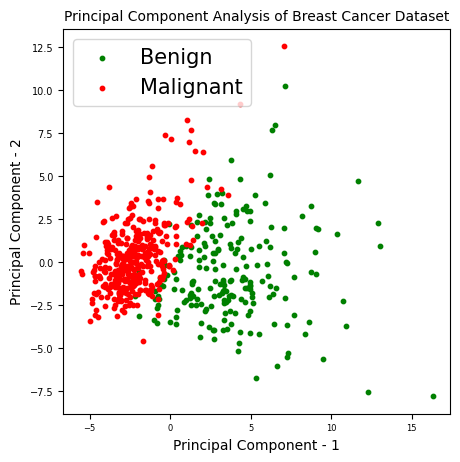

In [115]:
# Plot the 2 extracted factors (PCs) and compare then grafically with Scatter. 
# You will see that each factor will represent different clusters since there are few 
# Intersections on them. 

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=6)
plt.yticks(fontsize=7)
plt.xlabel('Principal Component - 1',fontsize=10)
plt.ylabel('Principal Component - 2',fontsize=10)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=10)
targets = ['Benign', 'Malignant']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 10)

plt.legend(targets,prop={'size': 15})